In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [3]:
data_dir = 'C:/Users/AI-09/Desktop/Project/ISIC-images'
label_file = 'C:/Users/AI-09/Desktop/Project/ISIC_2020_Training_GroundTruth.csv'
output_dir = 'C:/Users/AI-09/Desktop/Project/output'

labels_df = pd.read_csv(label_file)
print(labels_df.head())


     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0  


In [7]:

label_encoder = LabelEncoder()
labels_df['target'] = label_encoder.fit_transform(labels_df['target'])
labels_df['target'] = labels_df['target'].astype(str)  # Convert labels to string


In [8]:
train_df, val_df = train_test_split(labels_df, test_size=0.2, random_state=42)


In [20]:
image_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(train_df,
                                              directory=data_dir,
                                              x_col='image_name',
                                              y_col='target',
                                              target_size=image_size,
                                              batch_size=batch_size,
                                              class_mode='categorical')

val_generator = datagen.flow_from_dataframe(val_df,
                                            directory=data_dir,
                                            x_col='image_name',
                                            y_col='target',
                                            target_size=image_size,
                                            batch_size=batch_size,
                                            class_mode='categorical)



Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\AI-09\anaconda.4\envs\intern\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 26500 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(
C:\Users\AI-09\anaconda.4\envs\intern\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 6626 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


In [12]:
print(labels_df['image_name'].head())
print(os.listdir(data_dir)[:5])


0    ISIC_2637011
1    ISIC_0015719
2    ISIC_0052212
3    ISIC_0068279
4    ISIC_0074268
Name: image_name, dtype: object
['ISIC_0015719.jpg', 'ISIC_0052212.jpg', 'ISIC_0068279.jpg', 'ISIC_0074268.jpg', 'ISIC_0074311.jpg']


In [13]:
# Example to add .jpg extension if missing
labels_df['image_name'] = labels_df['image_name'].apply(lambda x: x if x.endswith('.jpg') else x + '.jpg')


In [14]:
data_dir ='C:/Users/AI-09/Desktop/Project/ISIC-images'
if not os.path.exists(data_dir):
    print(f"Directory {data_dir} does not exist.")


In [21]:
missing_files = [f for f in labels_df['image_name'] if not os.path.exists(f)]
if missing_files:
    print(f"Missing files: {missing_files[:5]}")  # Print first 5 missing files as a sample



In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure the file paths are correct
labels_df['image_name'] = labels_df['image_name'].apply(lambda x: os.path.join(data_dir, x))

# Proceed with data augmentation
image_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

train_df, val_df = train_test_split(labels_df, test_size=0.2, random_state=42)

train_generator = datagen.flow_from_dataframe(train_df,
                                              x_col='image_name',
                                              y_col='target',
                                              target_size=image_size,
                                              batch_size=batch_size,
                                              class_mode='categorical')

val_generator = datagen.flow_from_dataframe(val_df,
                                            x_col='image_name',
                                            y_col='target',
                                            target_size=image_size,
                                            batch_size=batch_size,
                                            class_mode='categorical')

# Verify the generator results
print(f"Found {train_generator.samples} validated image filenames belonging to {train_generator.num_classes} classes.")
print(f"Found {val_generator.samples} validated image filenames belonging to {val_generator.num_classes} classes.")



Found 26500 validated image filenames belonging to 2 classes.
Found 6626 validated image filenames belonging to 2 classes.


AttributeError: 'DataFrameIterator' object has no attribute 'num_classes'

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure the file paths are correct
labels_df['image_name'] = labels_df['image_name'].apply(lambda x: os.path.join(data_dir, x))

# Proceed with data augmentation
image_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

train_df, val_df = train_test_split(labels_df, test_size=0.2, random_state=42)

train_generator = datagen.flow_from_dataframe(train_df,
                                              x_col='image_name',
                                              y_col='target',
                                              target_size=image_size,
                                              batch_size=batch_size,
                                              class_mode='categorical')

val_generator = datagen.flow_from_dataframe(val_df,
                                            x_col='image_name',
                                            y_col='target',
                                            target_size=image_size,
                                            batch_size=batch_size,
                                            class_mode='categorical')

# Verify the generator results
print(f"Found {train_generator.samples} validated image filenames belonging to {len(train_generator.class_indices)} classes.")
print(f"Found {val_generator.samples} validated image filenames belonging to {len(val_generator.class_indices)} classes.")


Found 26500 validated image filenames belonging to 2 classes.
Found 6626 validated image filenames belonging to 2 classes.
Found 26500 validated image filenames belonging to 2 classes.
Found 6626 validated image filenames belonging to 2 classes.


In [24]:
print(labels_df.head())
print("Data Directory:", data_dir)


                                          image_name  patient_id     sex  \
0  C:/Users/AI-09/Desktop/Project/ISIC-images\ISI...  IP_7279968    male   
1  C:/Users/AI-09/Desktop/Project/ISIC-images\ISI...  IP_3075186  female   
2  C:/Users/AI-09/Desktop/Project/ISIC-images\ISI...  IP_2842074  female   
3  C:/Users/AI-09/Desktop/Project/ISIC-images\ISI...  IP_6890425  female   
4  C:/Users/AI-09/Desktop/Project/ISIC-images\ISI...  IP_8723313  female   

   age_approx anatom_site_general_challenge diagnosis benign_malignant target  
0        45.0                     head/neck   unknown           benign      0  
1        45.0               upper extremity   unknown           benign      0  
2        50.0               lower extremity     nevus           benign      0  
3        45.0                     head/neck   unknown           benign      0  
4        55.0               upper extremity   unknown           benign      0  
Data Directory: C:/Users/AI-09/Desktop/Project/ISIC-images


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
epochs = 2

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation accuracy: {val_acc:.4f}")

# Save the model
model.save(os.path.join(output_dir, 'skin_cancer_cnn_model.h5'))


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
epochs = 25

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation accuracy: {val_acc:.4f}")

# Save the model
model.save(os.path.join(output_dir, 'skin_cancer_cnn_model.h5'))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,842 (49.36 MB)

 Trainable params: 12,939,842 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
  4/829 ━━━━━━━━━━━━━━━━━━━━ 37:47 3s/step - accuracy: 0.5911 - loss: 0.4149

KeyboardInterrupt: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,842 (49.36 MB)

 Trainable params: 12,939,842 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
829/829 ━━━━━━━━━━━━━━━━━━━━ 3509s 4s/step - accuracy: 0.9716 - loss: 0.1138 - val_accuracy: 0.9820 - val_loss: 0.0959
Epoch 2/2
829/829 ━━━━━━━━━━━━━━━━━━━━ 3317s 4s/step - accuracy: 0.9823 - loss: 0.0909 - val_accuracy: 0.9820 - val_loss: 0.0958


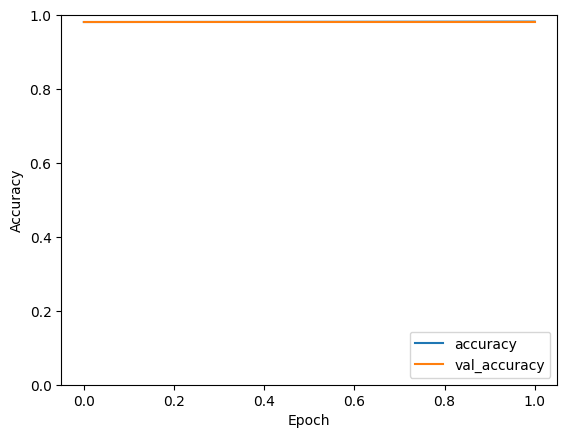

208/208 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.9812 - loss: 0.1012


Validation accuracy: 0.9820


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
epochs = 2

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation accuracy: {val_acc:.4f}")

# Save the model
model.save(os.path.join(output_dir, 'skin_cancer_cnn_model.h5'))


In [28]:
# Save the model using the recommended native Keras format
model.save(os.path.join(output_dir, 'skin_cancer_cnn_model.keras'))

# Optionally, you can also save the model in the TensorFlow SavedModel format
# model.save(os.path.join(output_dir, 'skin_cancer_cnn_model'))

print("Model saved successfully.")



Model saved successfully.
